In [15]:
import Pkg; 
#Pkg.add("LinearAlgebra")
#Pkg.add("Plots")
using LinearAlgebra
using Plots

In [41]:
function checkEigenChange(A, H)
    print("Eigenvalues Unchanged = ", .001 > abs(norm(eigen(A).values - eigen(H).values)))
end

checkEigenChange (generic function with 1 method)

## Perform a Hessenberg decomposition


In [13]:
function HessenbergDown(A, m)
    H = copy(A)
    Q = zeros(m, m)
    for i in 1:m-2
        u = H[:,i]
        u[1:i] *= 0.0; 
        u[i + 1] -= norm(u)
        u = normalize(u)
        Q = I - 2 * u * u'
        H = Q*H*Q'
    end 
    return H
end

HessenbergDown (generic function with 1 method)

In [42]:
m = 8
A = rand((-1.0:1.0), m, m)
H = HessenbergDown(A, m)
#display(A)
checkEigenChange(A, H)
display(H)
#heatmap(H)

Eigenvalues Unchanged = true

8×8 Matrix{Float64}:
 -1.0  -1.5          -0.070014     …  -1.306         0.209701   -0.572021
  2.0  -0.75          1.36527         -0.14035      -0.336041    0.243505
  0.0   1.78536      -0.504902        -0.965998      0.83163    -0.668421
  0.0   3.83355e-17   2.1859          -0.9572        0.0251249  -1.91712
  0.0   4.99648e-17   1.39231e-16      0.432308     -0.491915    0.570688
  0.0   2.65824e-17  -4.95777e-16  …  -1.54472       0.220709   -0.389372
  0.0   3.85427e-17  -8.21789e-17      1.41582       0.5344     -0.461701
  0.0  -7.99022e-17  -1.36428e-16      1.15042e-16  -1.60137     0.939998

## Perform the decomposition in an upward direction instead of downward

In [11]:
function HessenbergUp(A, m)
    H = copy(A)
    Q = zeros(m, m)
    for i in m:-1:3
        u = H[i,:]
        u[i:m] *= 0.0; 
        u[i - 1] -= norm(u)
        u = normalize(u)
        Q = I - 2 * u * u'
        H = Q*H*Q'
    end 
    return H
end

HessenbergUp (generic function with 1 method)

8×8 Matrix{Float64}:
 0.404588  0.47961     0.0161822  0.33736    …  0.509476  0.529791  0.23165
 0.490744  0.617782    0.0429282  0.421202      0.129378  0.268976  0.486548
 0.262926  0.543066    0.522728   0.0930361     0.981654  0.632004  0.318008
 0.498712  0.0211667   0.210971   0.130412      0.585487  0.874444  0.110225
 0.416642  0.60147     0.816746   0.204512      0.246181  0.233897  0.0303431
 0.379492  0.418491    0.0175072  0.479151   …  0.060741  0.763585  0.539642
 0.589537  0.335013    0.291382   0.836051      0.397776  0.946602  0.971544
 0.311759  0.00309154  0.639205   0.276507      0.271198  0.085771  0.986347

Eigenvalues Unchanged = true

8×8 Matrix{Float64}:
 -0.256247      0.0400764     0.344839     …   0.0779396   0.0377953
  0.00237277    0.0984548     0.31478          0.526837    0.326519
  1.79043e-17   0.403358     -0.0706074       -0.254628    0.00318244
 -7.12267e-17  -1.68216e-16   0.606193         0.187513    0.307497
  3.1283e-17    3.24183e-17   2.14273e-17      0.119981   -0.178668
 -3.93854e-17  -6.41331e-17  -6.48331e-17  …   1.23629     1.04718
  1.16721e-16  -5.60689e-17  -2.97604e-17      2.10717     0.555499
 -2.21181e-17  -5.81318e-17  -2.64148e-20      0.998539    0.986347

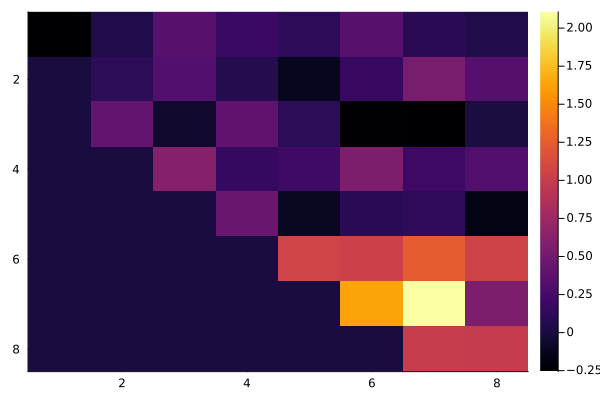

In [47]:
m = 8
A = rand(m, m)
H = HessenbergUp(A, m)
display(A)
checkEigenChange(A, H)
display(H)
heatmap(H, yflip=true)

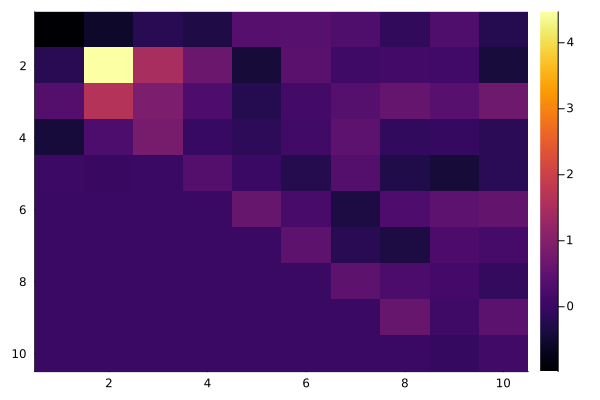

In [45]:
m = 10
A = rand(m, m); 
H = HessenbergDown(A, m)#[2]; 
#\[Lambda]s = Eigenvalues[H];
v = zeros(m); 
v[1] = 1.0;
mus = [1.2, 3.4, 5.6]
for i in 1:length(mus)
    v = (H - mus[i] * I) * v; 
end
u = v; 
u[1] -= norm(u)
u = normalize(u)
Q = I - 2 * u * u'
B = Q * H * Q'
heatmap(B, yflip=true)